In [110]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from sklearn.impute import SimpleImputer

In [2]:
def rmse(y_true, y_pred):
    return np.sqrt(np.nanmean((y_true - y_pred)**2))

# Open dict with collocated SAR data

In [3]:
data_dir = "/lustre/storeB/project/IT/geout/machine-ocean/data_raw/sentinel/"

In [4]:
with open(data_dir + 'collocated_dict_5e_4_filtered_cnn.pickle', 'rb') as handle:
        d = pickle.load(handle)

In [5]:
df = pd.concat(d.values(), ignore_index=True)
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,grid_lons_110,grid_lons_111,grid_lons_112,grid_lons_113,grid_lons_114,grid_lons_115,grid_lons_116,grid_lons_117,grid_lons_118,grid_lons_119
0,0.131507,0.306354,344.480002,2476.816541,1005.776480,1006.983499,5.750744,5.858569,73.541799,72.235029,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
1,0.169644,0.076862,301.660002,2477.280367,1011.450370,1012.675998,5.016032,5.128066,77.170098,76.182660,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
2,0.025622,-0.383063,274.325002,2476.904365,1020.987403,1022.212997,4.964464,5.199127,66.090098,63.038793,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
3,-0.202953,-0.490062,309.255003,2476.669098,1013.606853,1014.807996,4.241058,4.533348,44.618498,40.755557,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
4,-0.026441,-0.730744,320.615001,2475.218603,1018.266915,1019.488495,7.084940,7.120605,91.120398,91.004979,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,0.078067,-0.018678,257.135000,2491.579194,994.525701,995.769507,2.913308,2.980954,77.774753,76.929502,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
767,0.078067,-0.018678,238.530001,2491.798855,999.285638,1000.545505,2.513606,2.630492,80.575903,79.902359,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
768,0.078067,-0.018678,266.660001,2491.502372,1002.762277,1004.015002,2.848601,2.917305,75.022252,74.087723,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
769,0.078067,-0.018678,307.060001,2491.494117,963.167535,964.349008,5.345668,5.334279,94.738453,94.818847,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0


In [6]:
df = df.dropna(subset=['UWr', 'rhoair'])
df

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,grid_lons_110,grid_lons_111,grid_lons_112,grid_lons_113,grid_lons_114,grid_lons_115,grid_lons_116,grid_lons_117,grid_lons_118,grid_lons_119
0,0.131507,0.306354,344.480002,2476.816541,1005.776480,1006.983499,5.750744,5.858569,73.541799,72.235029,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
1,0.169644,0.076862,301.660002,2477.280367,1011.450370,1012.675998,5.016032,5.128066,77.170098,76.182660,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
2,0.025622,-0.383063,274.325002,2476.904365,1020.987403,1022.212997,4.964464,5.199127,66.090098,63.038793,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
3,-0.202953,-0.490062,309.255003,2476.669098,1013.606853,1014.807996,4.241058,4.533348,44.618498,40.755557,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
4,-0.026441,-0.730744,320.615001,2475.218603,1018.266915,1019.488495,7.084940,7.120605,91.120398,91.004979,...,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0,-124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
766,0.078067,-0.018678,257.135000,2491.579194,994.525701,995.769507,2.913308,2.980954,77.774753,76.929502,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
767,0.078067,-0.018678,238.530001,2491.798855,999.285638,1000.545505,2.513606,2.630492,80.575903,79.902359,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
768,0.078067,-0.018678,266.660001,2491.502372,1002.762277,1004.015002,2.848601,2.917305,75.022252,74.087723,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
769,0.078067,-0.018678,307.060001,2491.494117,963.167535,964.349008,5.345668,5.334279,94.738453,94.818847,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0


In [7]:
df = df.sample(frac = 1, random_state=77)
df     

,CE,CN,IR,Lv,P10,Pair,Q10,Qair,RH,RH10,...,grid_lons_110,grid_lons_111,grid_lons_112,grid_lons_113,grid_lons_114,grid_lons_115,grid_lons_116,grid_lons_117,grid_lons_118,grid_lons_119
384,-0.012150,-0.032903,329.650000,2484.919633,981.833176,983.035999,4.801381,4.852067,85.199704,84.816429,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
703,0.078067,-0.018678,328.049998,2485.081475,1018.852822,1020.094492,5.769578,5.773733,96.045652,96.170476,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
547,-0.012150,-0.032903,262.404997,2490.861123,1017.304386,1018.553506,4.284894,4.316867,81.548054,80.939972,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
343,-0.012150,-0.032903,344.449998,2477.154018,993.498046,994.705493,5.478307,5.527708,84.861454,84.644287,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
155,0.009946,-0.040725,332.674997,2482.830957,1005.523308,1006.754001,5.121342,5.164710,91.495950,91.405455,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,0.064698,0.066662,382.090001,2446.286109,1019.939140,1021.138998,9.228230,9.585403,88.167400,87.101354,...,-70.0,-70.0,-70.0,-70.0,-70.0,-70.0,-70.0,-70.0,-70.0,-70.0
235,0.009946,-0.040725,304.839998,2490.234728,1014.029920,1015.279489,4.760158,4.772068,96.832301,97.017771,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
596,-0.012150,-0.032903,307.009996,2481.803889,999.423692,1000.634009,6.482827,6.486903,94.549654,94.577806,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
607,-0.012150,-0.032903,351.980002,2478.168359,1019.863824,1021.104507,6.098199,6.111122,98.692553,98.937198,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0


In [8]:
df = df.replace(-9.223372036854776e+18, 9999)

In [9]:
c = df['stress']
y = - df['UWr'] * df['rhoair']

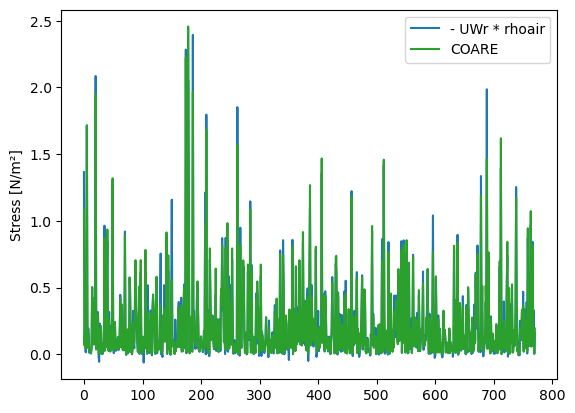

In [10]:
plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

In [11]:
split_idx = 560

# S0, inc, az

# Prepare features and labels

In [12]:
list_num_pixels = list(range(120))
s0_str = ['s0_' + str(n) for n in list_num_pixels]
inc_str = ['inc_' + str(n) for n in list_num_pixels]
az_str = ['az_' + str(n) for n in list_num_pixels]
#grid_lats_str = ['grid_lats_' + str(n) for n in list_num_pixels]
#grid_lons_str = ['grid_lons_' + str(n) for n in list_num_pixels]

predictor_variables = s0_str + inc_str + az_str #+ grid_lats_str + grid_lons_str

predictor_variables = ['s0', 'inc', 'az']

In [13]:
df[predictor_variables]

,s0_0,s0_1,s0_2,s0_3,s0_4,s0_5,s0_6,s0_7,s0_8,s0_9,...,az_110,az_111,az_112,az_113,az_114,az_115,az_116,az_117,az_118,az_119
384,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
703,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
547,-11.0,-10.0,-14.0,-11.0,-12.0,-12.0,9999.0,9999.0,9999.0,9999.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
343,-17.0,-18.0,-15.0,-18.0,-15.0,-15.0,9999.0,9999.0,9999.0,9999.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
155,-17.0,-16.0,-17.0,-16.0,-19.0,-16.0,9999.0,9999.0,9999.0,9999.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,-8.0,-11.0,-11.0,-9.0,-9.0,-9.0,-11.0,-14.0,-13.0,-12.0,...,280.0,280.0,280.0,280.0,280.0,280.0,280.0,280.0,280.0,280.0
235,-8.0,-6.0,-8.0,-7.0,-8.0,-7.0,9999.0,9999.0,9999.0,9999.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
596,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0
607,-24.0,-24.0,-26.0,-24.0,-23.0,-23.0,-24.0,-23.0,-20.0,-21.0,...,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0,9999.0


In [14]:
imp_mean = SimpleImputer(missing_values=9999, strategy='most_frequent')

In [15]:
x = imp_mean.fit_transform(df[predictor_variables])
x

array([[-15., -14., -14., ..., 280., 280., 280.],
       [-15., -14., -14., ..., 280., 280., 280.],
       [-11., -10., -14., ..., 280., 280., 280.],
       ...,
       [-15., -14., -14., ..., 280., 280., 280.],
       [-24., -24., -26., ..., 280., 280., 280.],
       [ -5.,  -4.,  -8., ..., 280., 280., 280.]])

In [16]:
x[0, 0]

-15.0

In [17]:
imp_mean = SimpleImputer(missing_values=-9.22337204e+18, strategy='constant')

In [18]:
x = imp_mean.fit_transform(x)
x

array([[-15., -14., -14., ..., 280., 280., 280.],
       [-15., -14., -14., ..., 280., 280., 280.],
       [-11., -10., -14., ..., 280., 280., 280.],
       ...,
       [-15., -14., -14., ..., 280., 280., 280.],
       [-24., -24., -26., ..., 280., 280., 280.],
       [ -5.,  -4.,  -8., ..., 280., 280., 280.]])

x = df[predictor_variables]
x

In [19]:
x.shape

(771, 360)

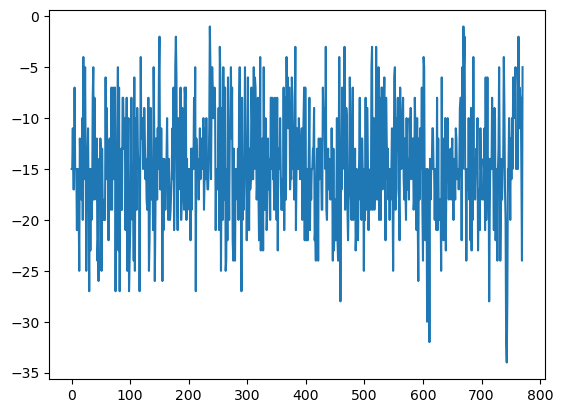

In [20]:
plt.plot(x[:, 0])

In [21]:
y = - df['UWr'] * df['rhoair']
y

384    1.364905
703    0.085199
547    0.171147
343    0.014584
155    0.153417
         ...   
293    0.842862
235    0.060775
596    0.330475
607    0.004852
727    0.157836
Length: 771, dtype: float64

In [22]:
y.isnull().values.sum()

0

# COARE

In [23]:
c = df['stress']

In [24]:
x_train = x[:split_idx]
x_test = x[split_idx:]

In [25]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [26]:
c_train = c[:split_idx]
c_test = c[split_idx:]

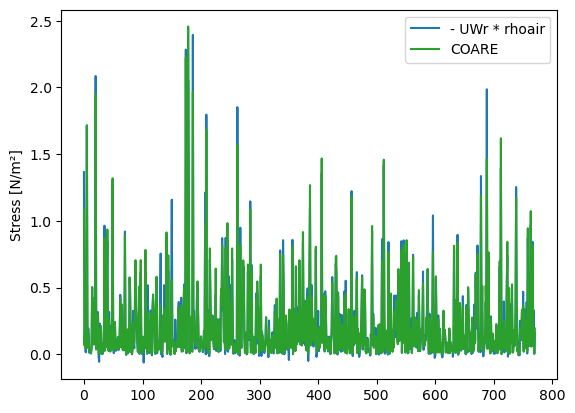

In [27]:

plt.plot(y.values, label='- UWr * rhoair')
plt.plot(c.values, label='COARE', color='C2')
plt.ylabel('Stress [N/m²]')       
plt.legend()

# CNN

For the CNN we neew to reshape s0, inc, and az vectors, to matrices of shape (num_records, 12, 10, num_variables).

In [28]:
s0_arr = ( df[s0_str].values ).reshape(df[s0_str].shape[0], 12, 10)
inc_arr = ( df[inc_str].values ).reshape(df[inc_str].shape[0], 12, 10)
az_arr = ( df[az_str].values ).reshape(df[az_str].shape[0], 12, 10)

In [29]:
x = np.stack([s0_arr, inc_arr, az_arr], axis=3)
x.shape

(771, 12, 10, 3)

In [30]:
x_train = x[:split_idx, :, :, :]
x_test = x[split_idx:, :, :, :]

In [31]:
y_train = y[:split_idx]
y_test = y[split_idx:]

In [32]:
x_train.shape

(560, 12, 10, 3)

In [33]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from tensorflow.keras import layers

In [34]:
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [88]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation([-1, 1]),
  tf.keras.layers.experimental.preprocessing.RandomContrast(1)
  #tf.keras.layers.experimental.preprocessing.RandomBrightness(1)
])

In [89]:
x_train.shape

(560, 12, 10, 3)

In [100]:
OUT_STEPS = 1
num_features = 1
batch_size =16
epochs=500

metric = 'mean_absolute_error'

In [101]:
try:
    del history
    del multi_dense_model
except:
    print('Variables do not exist')

In [102]:
multi_dense_model = tf.keras.Sequential([
    #data_augmentation,
    tf.keras.layers.Conv2D(16, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(12, 10, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Conv2D(32, kernel_size=(4,4), strides=(1,1), padding='same', activation='relu', input_shape=(12, 10, 3)),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1)    
])


callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.h5", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]

multi_dense_model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.losses.MeanSquaredError(),
    metrics=[tf.metrics.MeanAbsoluteError()],
)


history = multi_dense_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.3,
    verbose=1,
)

Epoch 1/500
17/25 [===================>..........] - ETA: 0s - loss: 2.6423 - mean_absolute_error: 1.2363

/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(
/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


25/25 [==============================] - 0s 13ms/step - loss: 2.2471 - mean_absolute_error: 1.1293 - val_loss: 16.1659 - val_mean_absolute_error: 3.4511
Epoch 2/500
 7/25 [=======>......................] - ETA: 0s - loss: 0.9170 - mean_absolute_error: 0.7744

/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


25/25 [==============================] - 0s 12ms/step - loss: 0.9159 - mean_absolute_error: 0.7563 - val_loss: 5.8480 - val_mean_absolute_error: 2.0883
Epoch 3/500
25/25 [==============================] - 0s 13ms/step - loss: 0.6917 - mean_absolute_error: 0.6528 - val_loss: 3.6622 - val_mean_absolute_error: 1.6370
Epoch 4/500
25/25 [==============================] - 0s 12ms/step - loss: 0.6195 - mean_absolute_error: 0.6210 - val_loss: 2.1221 - val_mean_absolute_error: 1.2442
Epoch 5/500
25/25 [==============================] - 0s 12ms/step - loss: 0.5203 - mean_absolute_error: 0.5782 - val_loss: 1.2271 - val_mean_absolute_error: 0.9713
Epoch 6/500
25/25 [==============================] - 0s 12ms/step - loss: 0.4765 - mean_absolute_error: 0.5329 - val_loss: 0.6149 - val_mean_absolute_error: 0.6708
Epoch 7/500
25/25 [==============================] - 0s 12ms/step - loss: 0.5047 - mean_absolute_error: 0.5451 - val_loss: 0.3882 - val_mean_absolute_error: 0.5431
Epoch 8/500
25/25 [=========

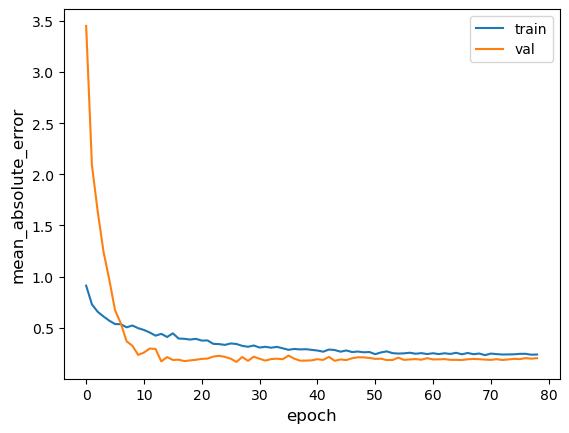

7/7 [==============================] - 0s 4ms/step - loss: 0.0817 - mean_absolute_error: 0.2087
Test accuracy 0.20869868993759155
Test loss 0.08166097849607468


/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


In [103]:
metric = 'mean_absolute_error'
plt.figure()
plt.plot(history.history[metric])
plt.plot(history.history["val_" + metric])
#plt.title("model " + metric + "\n Dense 32 + dense 16 + batch normalization + dropout 0.3")
plt.ylabel(metric, fontsize="large")
plt.xlabel("epoch", fontsize="large")
plt.legend(["train", "val"], loc="best")
plt.show()
plt.close()

#model = keras.models.load_model("best_model.h5")

test_loss, test_acc = multi_dense_model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

In [104]:
y_test_pred = multi_dense_model.predict(x_test)

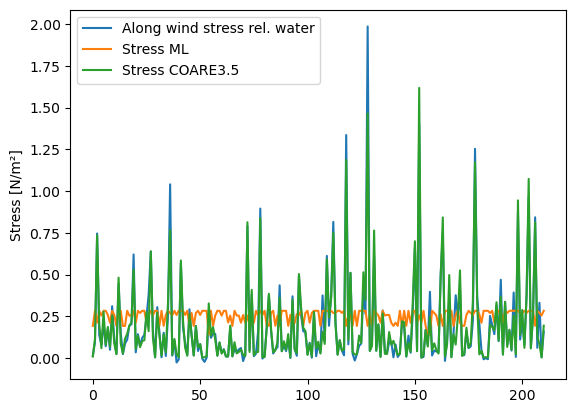

In [105]:
plt.plot(y_test.values, label='Along wind stress rel. water')
plt.plot(y_test_pred, label='Stress ML')
plt.plot(c_test.values, label='Stress COARE3.5')
plt.ylabel('Stress [N/m²]')
plt.legend()

In [106]:
rmse(y_test.values, y_test_pred)

0.2852098835177853

In [107]:
rmse(y_test.values, c_test.values)

0.06989463144562381

In [108]:
np.corrcoef(y_test.values, y_test_pred[:, 0])

array([[ 1.        , -0.01536345],
       [-0.01536345,  1.        ]])

In [109]:
np.corrcoef(y_test.values, c_test.values)

array([[1.        , 0.96802152],
       [0.96802152, 1.        ]])

# Example from tf

In [51]:
import tensorflow_datasets as tfds
ds, meta = tfds.load('citrus_leaves', with_info=True, split='train', shuffle_files=True)

2023-03-07 13:49:15.250325: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "Not found: Could not locate the credentials file.". Retrieving token from GCE failed with "Failed precondition: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Couldn't resolve host 'metadata'".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /home/paulinast/tensorflow_datasets/citrus_leaves/0.1.2.incompleteQZK7Y0/citrus_leaves-train.tfrecor…

Dataset citrus_leaves downloaded and prepared to /home/paulinast/tensorflow_datasets/citrus_leaves/0.1.2. Subsequent calls will reuse this data.


/home/paulinast/.conda/envs/mlstormsurge/lib/python3.9/site-packages/tensorflow/python/data/ops/dataset_ops.py:3503: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  warnings.warn(


In [52]:
ds

<PrefetchDataset shapes: {image: (None, None, 3), image/filename: (), label: ()}, types: {image: tf.uint8, image/filename: tf.string, label: tf.int64}>

In [73]:
ds = ds.batch(32)

In [74]:
for sample in ds.take(1):
    images, labels = sample["image"], sample["label"]
    print(images.shape)

(32, 256, 256, 3)


2023-03-07 14:07:46.708731: W tensorflow/core/kernels/data/cache_dataset_ops.cc:757] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [76]:
images[0].numpy().shape

(256, 256, 3)

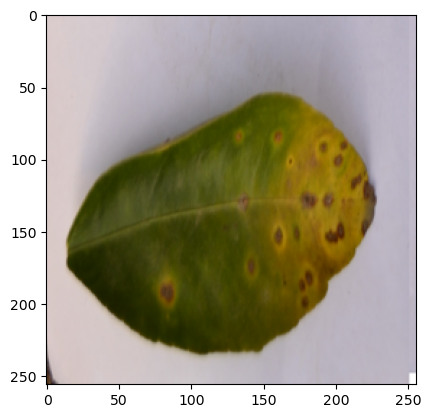

In [77]:
plt.imshow(images[0].numpy().astype("uint8"))

In [79]:
# create a resizing layer
out_height, out_width = 128,256
resize = tf.keras.layers.experimental.preprocessing.Resizing(out_height, out_width)

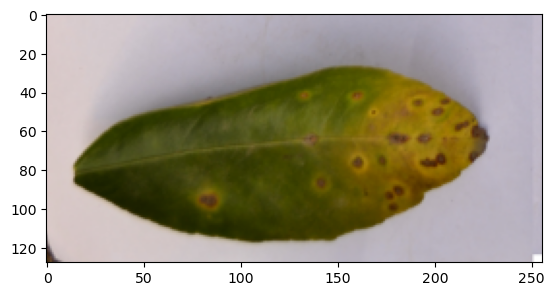

In [82]:
plt.imshow(resize(images[0]).numpy().astype("uint8"))

In [83]:
def augment(image, label):
    return resize(image), label

resized_ds = ds.map(augment)

TypeError: in user code:


    TypeError: tf__augment() missing 1 required positional argument: 'label'
